In [2]:
conda -v



Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: the following arguments are required: command


In [3]:
conda --version

conda 4.8.3

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install pandas=0.25

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sukhv\Anaconda3

  added / updated specs:
    - pandas=0.25


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         125 KB
    certifi-2019.11.28         |           py37_1         157 KB
    conda-4.8.3                |           py37_0         2.8 MB
    pandas-0.25.1              |   py37ha925a31_0         7.6 MB
    ------------------------------------------------------------
                                           Total:        10.7 MB

The following packages will be UPDATED:

  pandas                              0.24.2-py37ha925a31_0 --> 0.25.1-py37ha925a31_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-cert

In [1]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pytrends.request import TrendReq


In [5]:
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(['Coronavirus'], cat=0, timeframe='2020-01-01 2020-04-01',  gprop='', geo='US-NY')

In [6]:
df = pytrends.interest_over_time()
print(df.head())

            Coronavirus  isPartial
date                              
2020-01-01            0      False
2020-01-02            0      False
2020-01-03            0      False
2020-01-04            0      False
2020-01-05            0      False


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
df['timestamp'] = pd.to_datetime(df.index)
sns.lineplot(df['timestamp'], df['Coronavirus'])
plt.title("Normalized Searches for Coronavirus in NY")
plt.ylabel("Number of Searches")
plt.xlabel("Date")

C:\Users\sukhv\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date')

In [9]:
pytrend = TrendReq()
trending_searches_df = pytrend.trending_searches(pn='united_states')
print(trending_searches_df.head(20))

                                      0
0                           Census 2020
1            Florida stay-at-home order
2                      Adam Schlesinger
3                               6ix9ine
4                               Florida
5                                Zantac
6              Georgia shelter-in-place
7                               UFC 249
8                         Zoom meetings
9   How to make a face mask with fabric
10                          Sean Taylor
11                            Wimbledon
12       April Fools pranks for Parents
13                          Greg Abbott
14                   Christopher Meloni
15                       Walmart stores
16                          Larry David
17                        Wallace Roney
18                                April
19                   California schools


In [12]:
trending_searches_df = pytrend.trending_searches(pn='greece')
print(trending_searches_df.head(20))


                                 0
0                       Office 365
1               Μαστερ σεφ σποιλερ
2   Κωνσταντινοσ λεβαντησ ηθοποιοσ
3       ΕΠΙΔΟΜΑ 800 δικαιολογητικα
4                       Μπαλαουρασ
5                 Assassin's Creed
6                      Andrew Jack
7                         Απριλιοσ
8                     Άντριου Τζακ
9                              ΑΠΘ
10                      1 απριλιου
11                    Τζενη καρεζη
12                    Λαικο λαχειο
13            Σωτήρης Γεωργούντζος
14         Ιερα συνοδοσ ανακοινωση
15                            ΕΟΚΑ
16                    MasterChef 1
17                         Απριλησ
18                Γιαννησ κυραστασ
19             Ειρήνη Παπαδοπούλου


In [13]:
trending_searches_df = pytrend.trending_searches(pn='italy')
print(trending_searches_df.head(20))

                            0
0               WhatsApp down
1                 Truman Show
2             Casa di carta 4
3                         Doc
4          Svezia coronavirus
5                Michelangelo
6           Maurizio Costanzo
7          Mozzarella Stories
8   Giornata mondiale autismo
9                Lucio Presta
10     San Francesco di Paola
11            Whoopi Goldberg
12                 Pappalardo
13                Ibrahimovic
14                       Inps
15            Meteo di domani
16              Cassa Forense
17                 Inps login
18                John Wick 2
19    Conte conferenza stampa


In [14]:
# Get Google Hot Trends data
today_searches_df = pytrend.today_searches(pn='US')
print(today_searches_df.head(20))

0                             Census 2020
1              Florida stay-at-home order
2                        Adam Schlesinger
3                                 6ix9ine
4                                 Florida
5                                  Zantac
6                Georgia shelter-in-place
7                                 UFC 249
8                           Zoom meetings
9     How to make a face mask with fabric
10                            Sean Taylor
11                              Wimbledon
12                            Greg Abbott
13                         Walmart stores
14                     Christopher Meloni
15                         Robert Redford
16                         Rob Gronkowski
17                            Larry David
18                                   Iran
19                          Wallace Roney
Name: query, dtype: object


In [15]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrend.build_payload(kw_list=['coronavirus'])
 
# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.tail(10))

            coronavirus isPartial
date                             
2020-01-26           15     False
2020-02-02            9     False
2020-02-09            7     False
2020-02-16            6     False
2020-02-23           28     False
2020-03-01           36     False
2020-03-08           76     False
2020-03-15          100     False
2020-03-22           85     False
2020-03-29           71      True


In [16]:
# Interest by Region
interest_by_region_df = pytrend.interest_by_region()
print(interest_by_region_df.sort_values(['coronavirus'], ascending=False).head(20))


                      coronavirus
geoName                          
Italy                         100
Spain                          80
Ireland                        62
France                         60
United Kingdom                 56
Switzerland                    54
Qatar                          48
United States                  44
Canada                         44
Panama                         44
New Zealand                    42
Australia                      42
United Arab Emirates           40
South Africa                   40
Austria                        40
Argentina                      38
Portugal                       38
Germany                        38
Romania                        38
Colombia                       36


In [17]:
# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
print(related_queries_dict['coronavirus']['top'].head(20))
print(related_queries_dict['coronavirus']['rising'].head(20))

                   query  value
0     coronavirus update    100
1                 corona     83
2      coronavirus cases     70
3       news coronavirus     70
4   coronavirus symptoms     70
5         uk coronavirus     48
6      coronavirus india     43
7           corona virus     43
8        coronavirus map     37
9      china coronavirus     37
10    coronavirus italia     35
11    coronavirus france     31
12       usa coronavirus     29
13                 italy     29
14     italy coronavirus     28
15        coronavirus us     27
16  sintomas coronavirus     26
17      coronavirus live     25
18    coronavirus españa     25
19  coronavirus in india     22
                         query  value
0                     covid 19  80500
1       coronavirus death toll  54400
2      worldometer coronavirus  49000
3                  worldometer  48400
4            wuhan coronavirus  43450
5            coronavirus stats  38050
6         us coronavirus cases  37200
7   ultime notizie coron

In [18]:
related_topic = pytrend.related_topics()
related_topic['coronavirus']['rising'].drop(['link','topic_mid'], axis=1).head(20)

,value,formattedValue,topic_title,topic_type
0,70600,Breakout,Worldometers,Website
1,52300,Breakout,Johns Hopkins University,"Private university in Baltimore, Maryland"
2,47200,Breakout,Cubit,Topic
3,46700,Breakout,Covid,"Electronics manufacturer in Tempe, Arizona"
4,44900,Breakout,Wuhan,City in China
5,42350,Breakout,U.S. state,Topic
6,28350,Breakout,Última Hora,Topic
7,24700,Breakout,Austria,Country in Europe
8,22900,Breakout,Romania,Country in the Balkans
9,21200,Breakout,Decree,Topic


In [21]:
def get_searches(key_word, state):
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([key_word], cat=0, timeframe='2020-01-01 2020-04-01',  gprop='',geo='US-{}'.format(state))    
    df = pytrends.interest_over_time()
            
    
    print(df.head())
    
    sns.set()
    df['timestamp'] = pd.to_datetime(df.index)
    sns.lineplot(df['timestamp'], df[key_word])
    
    plt.title("Normalized Searches for {} in {}".format(key_word, state))
    plt.ylabel("Number of Searches")
    plt.xlabel("Date")

            Coronavirus  isPartial
date                              
2020-01-01            0      False
2020-01-02            0      False
2020-01-03            0      False
2020-01-04            0      False
2020-01-05            0      False
            Coronavirus  isPartial
date                              
2020-01-01            0      False
2020-01-02            0      False
2020-01-03            0      False
2020-01-04            0      False
2020-01-05            0      False
            Coronavirus  isPartial
date                              
2020-01-01            0      False
2020-01-02            0      False
2020-01-03            0      False
2020-01-04            0      False
2020-01-05            0      False


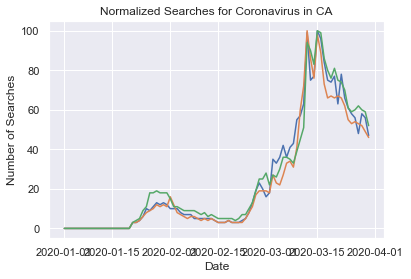

In [22]:
get_searches('Coronavirus', 'NY')
get_searches('Coronavirus', 'MA')
get_searches('Coronavirus', 'CA')